# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : Humanitarian Aid

Objective : Membuat model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mengelompokkan negara-negara rencana penerima bantuan. Dan berikan rekomendasi Negara ke CEO untuk disalurkan bantuannya.

# **2 - Query SQL**

Bagian ini menunjukan cara mendapatkan dataset dari Google Big Query dengan menggunakan query sql, maupun data loading dengan CSV

# **3 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [347]:
# Importing libraries
import pandas as pd
import numpy as np

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report, accuracy_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer

# Importing Libraries
import pickle
import json

# Warning Library
import warnings
warnings.filterwarnings('ignore')

# **4 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [348]:
# Load the data
data = pd.read_csv('/content/humanitarian-aid.csv')

# Copy the data to make sure the original is untouchable
copyData = data.copy()

# Display
copyData

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Dataset berjumlah 167 baris dan 10 kolom

# **5 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [349]:
# Show Data information
copyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Hampir seluruh data bertipe numerik dan hanya data di kolom `country` yang bertipe kategorical dan data sudah bersih dari missing value

In [350]:
# Show data describe
copyData.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mortality,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expectancy,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fertility,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Data `child_mortality`, `income`, `inflation` dab `gdpp` cenderung memiliki skewness yang besar.

In [351]:
# Check negara penerima bantuan
copyData.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

Berikut list negara yang dijadikan rencana penerima bantuan

In [352]:
# Function visualization
def diagnosticPlot(df, variable):
  plt.figure(figsize = (16, 5))

  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=50)
  plt.title('Histogram of '+variable)

In [353]:
# Check child_mortality > 60%
copyData.loc[(copyData['child_mortality'] >= 60)]

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334


Berikut adalah negara yang memiliki persentase `child_mortality` diatas 60%, dimana yang hidup hanya 400 orang dari 1000 orang yang lahir. Angka ini cukup tinggi karena kemungkinan akan berpengaruh terhadap populasi negara tersebut

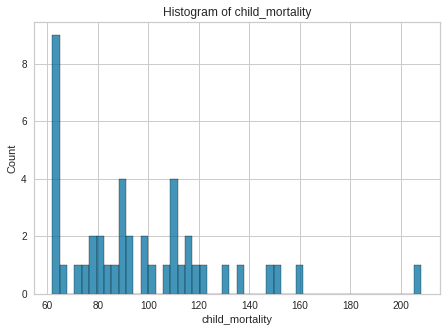

In [354]:
# Visualization child mortality  > 60
cm = copyData.loc[(copyData['child_mortality'] >= 60)]
diagnosticPlot(cm, 'child_mortality')

Berikut visualisasi angka kematian penduduk masing-masing negara dengan jumlah terbanyak ada dikisaran < 100

In [355]:
# Check inflation > 15
copyData.loc[(copyData['inflation'] >= 15)]

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
2,Algeria,27.3,38.40,4.17,31.4,12900,16.1,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.4,60.1,6.16,3530
5,Argentina,14.5,18.90,8.10,16.0,18700,20.9,75.8,2.37,10300
14,Belarus,5.5,51.40,5.61,64.5,16200,15.1,70.4,1.49,6030
23,Brunei,10.5,67.40,2.84,28.0,80600,16.7,77.1,1.84,35300
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.8,57.5,6.54,334
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.7,60.4,4.95,2740
49,Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.9,60.9,5.21,17100
55,Gabon,63.7,57.70,3.50,18.9,15400,16.6,62.9,4.08,8750
59,Ghana,74.7,29.50,5.22,45.9,3060,16.6,62.2,4.27,1310


Menurut penulusaran yang saya lakukan, batas wajar inflasi normal yaitu sampai dengan kisaran 5%, tetapi data diatas adalah negara-negara yang memiliki inflasi diatas 15% yang berarti inflasinya tergolong sangat tinggi, 3x lipat dari batas normal.

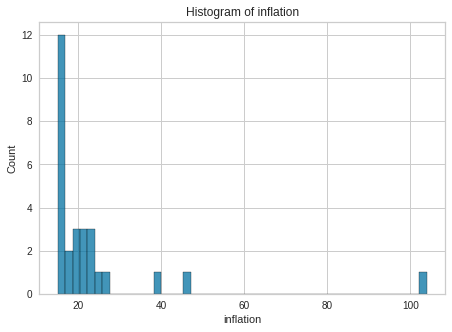

In [356]:
# Visualization of inflation > 15
inflation = copyData.loc[(copyData['inflation'] >= 15)]

diagnosticPlot(inflation, 'inflation')

Ada 1 negara yang memmiliki hyperinflasi > 100%

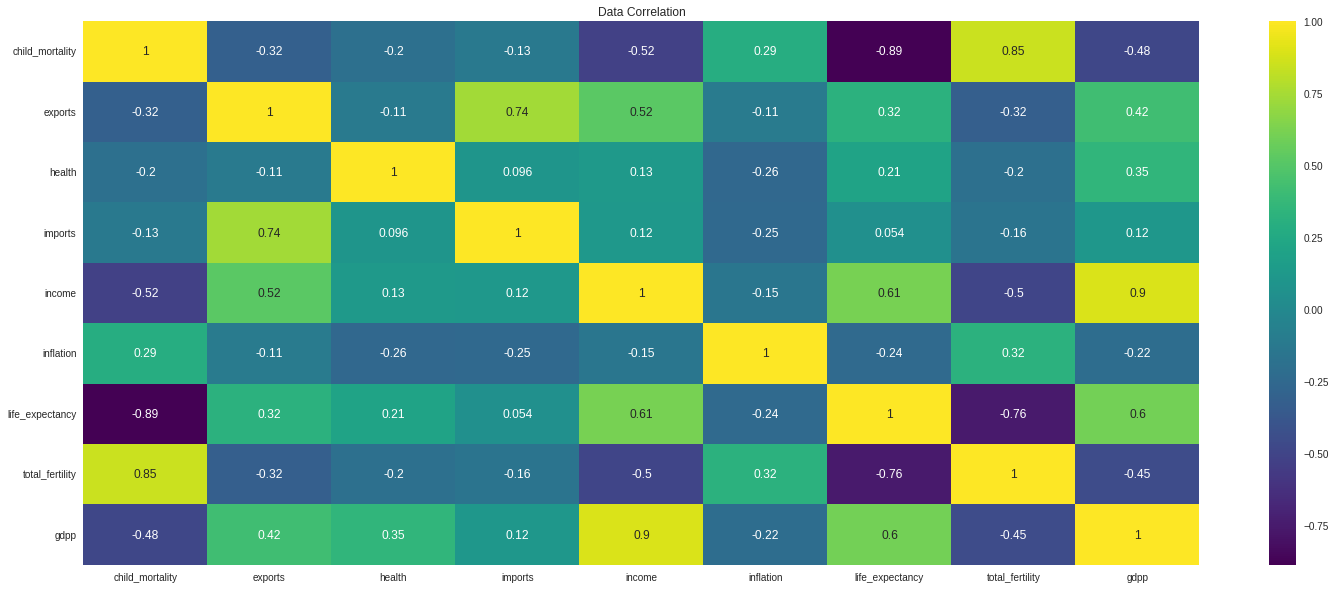

In [357]:
# Check korelasi
plt.figure(figsize=(25, 10))
sns.heatmap(copyData.corr(), annot=True, cmap='viridis')
plt.title('Data Correlation')
plt.show()

Berikut korelasi masing-masing data di dataset, angka imports dan exports memiliki korelasi tinggi yaitu 74%, sedangkan life expectacy dan child mortality memiliki korelasi berlawanan sebesar 89%

# **6. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 6.1 Data Binning

In [358]:
# Inflation binning
criteria = [
    (copyData['inflation'] > -5) & (copyData['inflation'] <= 5),
    (copyData['inflation'] > 5) & (copyData['inflation'] <= 15),
    (copyData['inflation'] > 15) & (copyData['inflation'] <= 50),
    (copyData['inflation'] > 50) & (copyData['inflation'] <= 100),
    (copyData['inflation'] > 100)
]

binLabel = ['normal', 'moderate', 'high-inflation', 'hyper-inflation', 'extreme-inflation']

copyData['inflation_bin'] = pd.cut(copyData['inflation'], bins = [-5, 5, 15, 50, 100, float('inf')], labels = binLabel)

copyData.inflation_bin.unique()

['moderate', 'normal', 'high-inflation', 'extreme-inflation']
Categories (5, object): ['normal' < 'moderate' < 'high-inflation' < 'hyper-inflation' <
                         'extreme-inflation']

Data inflation sudah dimasukan berdasarkan kriteria

## 6.2 Split between train and test

In [359]:
# Splitting data
train, test = train_test_split(copyData, test_size = 0.15, random_state=19)

# Check data shape
print('Shape data train : ', train.shape)
print('Shape data test  : ', test.shape)

# Display
train

Shape data train :  (141, 11)
Shape data test  :  (26, 11)


,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,inflation_bin
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,normal
165,Yemen,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310,high-inflation
36,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,normal
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,moderate
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,normal
...,...,...,...,...,...,...,...,...,...,...,...
52,Fiji,24.1,57.8,4.86,63.9,7350,4.230,65.3,2.67,3650,normal
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,moderate
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,normal
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300,normal


Perbandingan data train dan test adalah 85% : 15%. dengan total data train ada sebanyak 141 data dan data test ada sebanyak 26 data

## 6.3 Missing Value Handling

In [360]:
# Check missing value
print('Missing value data Train : ')
print(train.isnull().sum())
print(' ')
print('Missing value data Test : ')
print(test.isnull().sum())

Missing value data Train : 
country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
inflation_bin      0
dtype: int64
 
Missing value data Test : 
country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
inflation_bin      0
dtype: int64


Tidak ada missing value dalam data

## 6.4 Outlier Handling

Pada bagan ini, saya akan menghandle outlier jika :
1. Data outlier < 5%  akan didrop
2. Data outlier > 5% -  <= 30% akan dihandle
3. Data ouliier > 30% akan dibiarkan

In [361]:
# Outlier function recognition
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [362]:
cols = ['child_mortality', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expectancy', 'total_fertility', 'gdpp']
outlier_percentage = pd.DataFrame(columns = ['Column', 'Outlier Percentage'])
for i in range(len(cols)):
      outlier_percentage.loc[i] = [cols[i], round(upper_lower(train, cols[i]).shape[0] / train.shape[0] * 100, 2)]

outlier_percentage

,Column,Outlier Percentage
0,child_mortality,97.16
1,exports,96.45
2,health,98.58
3,imports,97.16
4,income,94.33
5,inflation,97.16
6,life_expectancy,99.29
7,total_fertility,100.00
8,gdpp,84.40


Sesuai pernyataan diatas maka outlier akan dibiarkan, dan saya juga berasumsi ini adalah outlier normal yang menggambarkan dimana data-data negara tersebut diambil. 

## 6.5 Feature Selection

In [363]:
# Drop columns inflation
train.drop(columns = ['inflation'], axis=1, inplace=True)
test.drop(columns = ['inflation'], axis=1, inplace=True)

# Display
train

,country,child_mortality,exports,health,imports,income,life_expectancy,total_fertility,gdpp,inflation_bin
135,Slovenia,3.2,64.3,9.41,62.9,28700,79.5,1.57,23400,normal
165,Yemen,56.3,30.0,5.18,34.4,4480,67.5,4.67,1310,high-inflation
36,Comoros,88.2,16.5,4.51,51.7,1410,65.9,4.75,769,normal
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,56.3,5.27,1220,moderate
8,Austria,4.3,51.3,11.00,47.8,43200,80.5,1.44,46900,normal
...,...,...,...,...,...,...,...,...,...,...
52,Fiji,24.1,57.8,4.86,63.9,7350,65.3,2.67,3650,normal
19,Bolivia,46.6,41.2,4.84,34.3,5410,71.6,3.20,1980,moderate
98,Malta,6.8,153.0,8.65,154.0,28300,80.3,1.36,21100,normal
110,Netherlands,4.5,72.0,11.90,63.6,45500,80.7,1.79,50300,normal


Saya mendrop kolom inflasi karena sudah saya bagi menjadi beberapa kategori

## 6.6 Split between categorical and numerical

In [364]:
# Split data numeric and categoric
numCol = train.select_dtypes(include = np.number).columns.tolist()
catCol = train.select_dtypes(include = ['category', 'object']).columns.tolist()

# Display
print('Numerical Data : ', numCol)
print('Categorical Data : ', catCol)

Numerical Data :  ['child_mortality', 'exports', 'health', 'imports', 'income', 'life_expectancy', 'total_fertility', 'gdpp']
Categorical Data :  ['country', 'inflation_bin']


In [365]:
# Split Train into numerical
trainNum = train[numCol]
trainCat = train[catCol]
testNum = test[numCol]
testCat = test[catCol]

Data train dan test sudah dibagi sesuai dengan kategori datanya

## 6.7 Data Scaling

In [366]:
# Scaling with standard Scaler
scaler = StandardScaler()
scaler.fit(trainNum)

# Applying
trainScaled = scaler.transform(trainNum)
testScaled = scaler.transform(testNum)

# Display
trainScaled

array([[-0.86719281,  0.75825314,  0.93066726, ...,  1.01492464,
        -0.90995289,  0.52575972],
       [ 0.39417396, -0.42637272, -0.57540468, ..., -0.31113906,
         1.0785503 , -0.63750803],
       [ 1.1519442 , -0.89262488, -0.81395508, ..., -0.48794755,
         1.12986651, -0.66599729],
       ...,
       [-0.78167642,  3.82170252,  0.66007278, ...,  1.10332889,
        -1.04465794,  0.40464085],
       [-0.83631189,  1.02418956,  1.81722025, ...,  1.14753101,
        -0.76883331,  1.94232389],
       [ 0.53432582, -0.59905871, -1.07742866, ..., -1.05152463,
         1.03364861, -0.68474439]])

Data numerical berhasil di scaling

## 6.8 Data Encoder

In [367]:
# Label Encoding
encoder = LabelEncoder()

# Applying
trainCat['country_enc'] = encoder.fit_transform(trainCat['country'])
trainCat['inflation_bin_enc'] = encoder.fit_transform(trainCat['inflation_bin'])
testCat['country_enc'] = encoder.fit_transform(testCat['country'])
testCat['inflation_bin_enc'] = encoder.fit_transform(testCat['inflation_bin'])

# Drop columns
trainCat.drop(columns = ['country', 'inflation_bin'], axis=1, inplace=True)
testCat.drop(columns = ['country', 'inflation_bin'], axis=1, inplace=True)

# Display
trainCat

,country_enc,inflation_bin_enc
135,116,3
165,140,1
36,29,3
40,33,2
8,5,3
...,...,...
52,45,3
19,14,2
98,87,3
110,95,3


## 6.9 Concat Data

In [368]:
# Concate data numeric and categoric
trainFinal = np.concatenate([trainScaled, trainCat], axis=1)
testFinal = np.concatenate([testScaled, testCat], axis=1)

# Create dataframe
trainFinalDF = pd.DataFrame(trainFinal, columns = [numCol + catCol])
testFinalDF = pd.DataFrame(testFinal, columns = [numCol + catCol])

# Display
trainFinalDF

,child_mortality,exports,health,imports,income,life_expectancy,total_fertility,gdpp,country,inflation_bin
0,-0.867193,0.758253,0.930667,0.593067,0.535345,1.014925,-0.909953,0.525760,116.0,3.0
1,0.394174,-0.426373,-0.575405,-0.542729,-0.659061,-0.311139,1.078550,-0.637508,140.0,1.0
2,1.151944,-0.892625,-0.813955,0.146719,-0.810457,-0.487948,1.129867,-0.665997,29.0,3.0
3,1.693548,0.285094,-0.532679,-0.188042,-0.747334,-1.548799,1.463422,-0.642247,33.0,2.0
4,-0.841063,0.309270,1.496779,-0.008705,1.250410,1.125430,-0.993342,1.763279,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
136,-0.370723,0.533761,-0.689339,0.632920,-0.517527,-0.554251,-0.204355,-0.514283,45.0,3.0
137,0.163755,-0.039556,-0.696460,-0.546714,-0.613198,0.141933,0.135615,-0.602226,14.0,2.0
138,-0.781676,3.821703,0.660073,4.223629,0.515619,1.103329,-1.044658,0.404641,87.0,3.0
139,-0.836312,1.024190,1.817220,0.620964,1.363834,1.147531,-0.768833,1.942324,95.0,3.0


## 6.10 PCA

In [369]:
# Inisialisasi awal dengan 9 pca
%%time
pca = PCA(n_components = 9)
pca.fit(trainFinalDF)

CPU times: user 4.28 ms, sys: 0 ns, total: 4.28 ms
Wall time: 4.62 ms


PCA(n_components=9)

In [370]:
# Find cumulative explained ration
%%time
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

CPU times: user 55 µs, sys: 4 µs, total: 59 µs
Wall time: 62 µs


array([0.99488788, 0.99733813, 0.99824554, 0.99891487, 0.99948625,
       0.99972274, 0.99985269, 0.99991486, 0.99996147])

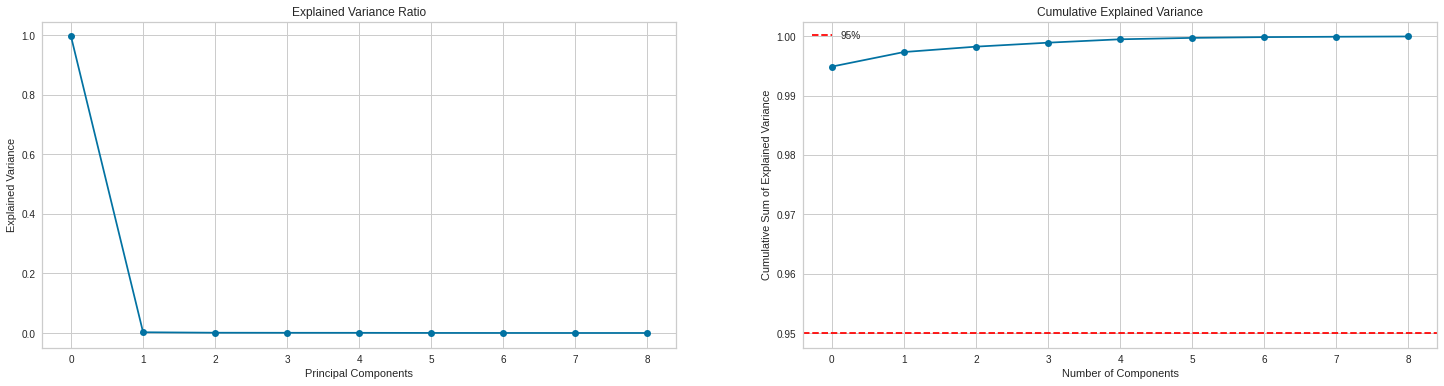

In [371]:
# Elbow method
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

plt.subplot(1, 2, 2)
cev = plt.plot(cumsum, marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label='95%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()

Dari elbow grafic menyatakan saya hanya menggunakan 2 dimensi

In [372]:
# PCA 1 dimensi
%%time
pca2 = PCA(n_components=2)

CPU times: user 22 µs, sys: 2 µs, total: 24 µs
Wall time: 27.2 µs


In [373]:
# Apply to train and test
%%time
trainPCA2 = pca2.fit_transform(trainScaled)
testPCA2 = pca2.transform(testScaled)

# dataframe
trainPCADF = pd.DataFrame(trainPCA2, columns=['PCA1', 'PCA2'])
testPCADF = pd.DataFrame(trainPCA2, columns=['PCA1', 'PCA2'])

# Display
trainPCADF

CPU times: user 2.51 ms, sys: 0 ns, total: 2.51 ms
Wall time: 2.55 ms


,PCA1,PCA2
0,2.052482,0.024001
1,-1.557095,-0.121996
2,-2.105492,0.330765
3,-2.554098,1.166375
4,2.735922,-0.854222
...,...,...
136,-0.226628,0.940662
137,-0.740593,-0.179492
138,3.585314,4.323825
139,3.135878,-0.058719


Berikut PCA yang direduksi dengan 1 dimensi

# **7 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [374]:
# Cek inisialiasi K awal
%%time
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = [KMeans(n_clusters = k, random_state = 19).fit(trainPCADF).inertia_ for k in K]

CPU times: user 383 ms, sys: 3.62 ms, total: 387 ms
Wall time: 211 ms


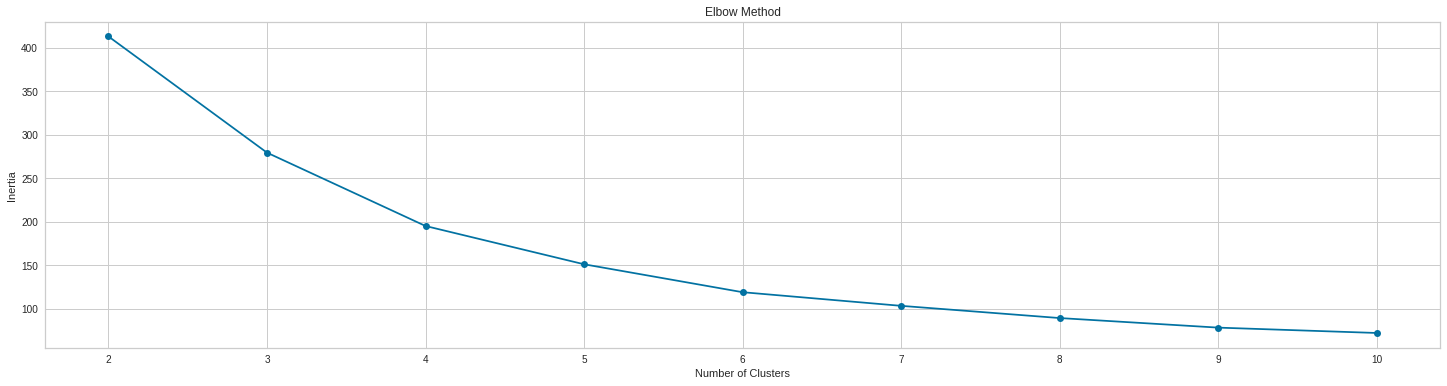

In [375]:
# Elbow Method
plt.figure(figsize=(25, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

cluster 4 dan 5 menjadi kandidat yang baik dalam nilai kmeansnya, tapi akan coba didukung dengan silhouette score

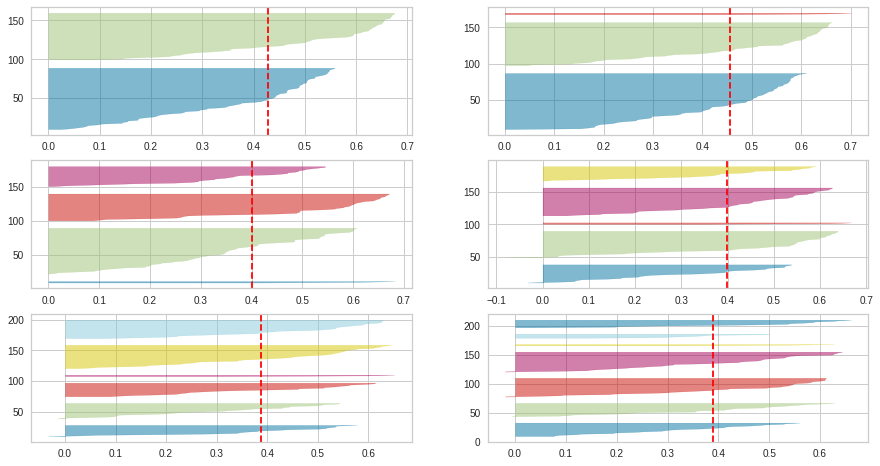

In [376]:
# Silhouette score visualization
fig, ax = plt.subplots(3, 2, figsize = (15,8))
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(trainPCADF)

Didukung dengan silhouette score maka saya akan menggunakan cluster 4 

# 8 - Model Training

---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [377]:
# KMeans with 4 cluster
%%time
kmeans4 = KMeans(n_clusters = 4)
kmeans4.fit(trainPCADF)

CPU times: user 39.4 ms, sys: 0 ns, total: 39.4 ms
Wall time: 29.7 ms


KMeans(n_clusters=4)

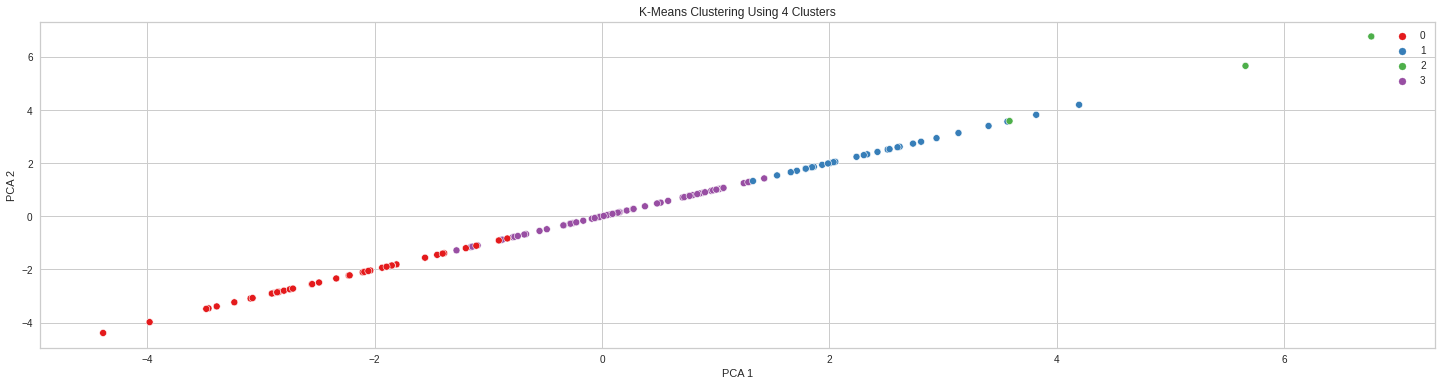

In [378]:
# Visualisasi of clustering
plt.figure(figsize=(25, 6))
sns.scatterplot(x=trainPCADF.PCA1, y=trainPCADF.PCA1, hue=kmeans4.labels_, data=trainPCADF, palette='Set1')
plt.title('K-Means Clustering Using 4 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Berikut adalah hasil dari clustering data, dimana ada 4 cluster yang terbagi. cluster cenderung berdekatan, namun tidak sampai bertumpuk 1 sama lain.

# **9 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

Evaluasi saya terhadap KMeans model yang diterapkan ini sudah cukup baik, dengan 4 cluster yang didukung dari nilai silhouette score nya di kisaran 0.57

# **10 - Model Inference**

---

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [408]:
# Random sampel dari original data
infData = data.sample(20, random_state=19)

# Reset index
infData = infData.reset_index()

# Drop column
infData.drop(columns=['index'], axis=1, inplace=True)

# Display
infData

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Tonga,17.4,12.4,5.07,60.3,4980,3.680,69.9,3.91,3550
1,Tunisia,17.4,50.5,6.21,55.3,10400,3.820,76.9,2.14,4140
2,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
3,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340
4,Guatemala,35.4,25.8,6.85,36.3,6710,5.140,71.3,3.38,2830
5,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
6,Mauritania,97.4,50.7,4.41,61.2,3320,18.900,68.2,4.98,1200
7,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480
8,Zambia,83.1,37.0,5.89,30.9,3280,14.000,52.0,5.40,1460
9,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630


In [409]:
# Inflation binning
criteria = [
    (copyData['inflation'] > -5) & (copyData['inflation'] <= 5),
    (copyData['inflation'] > 5) & (copyData['inflation'] <= 15),
    (copyData['inflation'] > 15) & (copyData['inflation'] <= 50),
    (copyData['inflation'] > 50) & (copyData['inflation'] <= 100),
    (copyData['inflation'] > 100)
]

binLabel = ['normal', 'moderate', 'high-inflation', 'hyper-inflation', 'extreme-inflation']

infData['inflation_bin'] = pd.cut(infData['inflation'], bins = [-5, 5, 15, 50, 100, float('inf')], labels = binLabel)

infData.inflation_bin.unique()

['normal', 'moderate', 'high-inflation']
Categories (5, object): ['normal' < 'moderate' < 'high-inflation' < 'hyper-inflation' <
                         'extreme-inflation']

In [410]:
# Split data numerical and categorical
infDataNum = infData[numCol]
infDataCat = infData[catCol]

# Scaling
infDataScaled = scaler.transform(infDataNum)

# Encoder
infDataCat['country_enc'] = encoder.fit_transform(infDataCat['country'])
infDataCat['inflation_bin_enc'] = encoder.fit_transform(infDataCat['inflation_bin'])

# Drop column
infDataCat.drop(columns=['country', 'inflation_bin'], axis=1, inplace=True)

# Concate
infDataFinal = np.concatenate([infDataScaled, infDataCat], axis=1)

infDataFinal

array([[-5.29878157e-01, -1.03422739e+00, -6.14569673e-01,
         4.89450778e-01, -6.34403338e-01, -4.59263197e-02,
         5.91046290e-01, -5.19548783e-01,  1.70000000e+01,
         2.00000000e+00],
       [-5.29878157e-01,  2.81639820e-01, -2.08677943e-01,
         2.90188320e-01, -3.67116864e-01,  7.27610840e-01,
        -5.44324882e-01, -4.88479160e-01,  1.80000000e+01,
         2.00000000e+00],
       [-5.48881800e-01, -4.95447115e-01, -8.76225148e-02,
         2.31766263e-02, -3.90294842e-01,  6.61307655e-01,
        -8.58636675e-01, -4.91112179e-01,  0.00000000e+00,
         2.00000000e+00],
       [-4.96621783e-01,  5.47576238e-01, -5.68283774e-01,
         3.77863801e-01, -4.91390280e-01,  1.19831643e-01,
        -1.78696877e-01, -4.77947084e-01,  4.00000000e+00,
         2.00000000e+00],
       [-1.02296203e-01, -5.71428949e-01,  1.91910983e-02,
        -4.67009020e-01, -5.49088652e-01,  1.08781112e-01,
         2.51076391e-01, -5.57464255e-01,  7.00000000e+00,
         1.

In [411]:
infPCA2 = pca2.fit_transform(infDataFinal)

In [412]:
# Modeling
infPred = kmeans4.predict(infPCA2)

In [415]:
infPred

array([2, 2, 0, 0, 0, 0, 3, 1, 1, 3, 1, 1, 0, 0, 0, 1, 3, 0, 1, 0],
      dtype=int32)

# **11 - Model Saving**

---


Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan mode

In [416]:
with open('KMeans4.pkl', 'wb') as file1:
  pickle.dump(kmeans4, file1)

with open('LabelEncoder.pkl', 'wb') as file1:
  pickle.dump(encoder, file1)

with open('Scaler.pkl', 'wb') as file1:
  pickle.dump(scaler, file1)

with open('Numerical.txt', 'w') as file1:
  json.dump(numCol, file1)

with open('Categorical.txt', 'w') as file1:
  json.dump(catCol, file1)

# **12 - Pengambilan Kesimpulan**

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Kmeans hanya menggunakan 2 clustering
2. PCA yang didapat hanya menggunakan 2 dimensi